In [43]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data_url = 'https://raw.githubusercontent.com/aniruddha7599/DAIICT-/refs/heads/main/NAFLD%20EDA.csv'
data = pd.read_csv(data_url)

In [44]:
# Define input and output variables
X = data.drop(columns=['Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)'])
y = data['Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)']

In [45]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [46]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')

In [47]:
# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [48]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [49]:
print("Number of trees in the forest:", len(rf_model.estimators_))

Number of trees in the forest: 100


In [50]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [51]:
# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7417582417582418
Precision: 0.7655172413793103
Recall: 0.8951612903225806
F1 Score: 0.8252788104089219
Confusion Matrix:
 [[ 24  34]
 [ 13 111]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.41      0.51        58
           1       0.77      0.90      0.83       124

    accuracy                           0.74       182
   macro avg       0.71      0.65      0.67       182
weighted avg       0.73      0.74      0.72       182



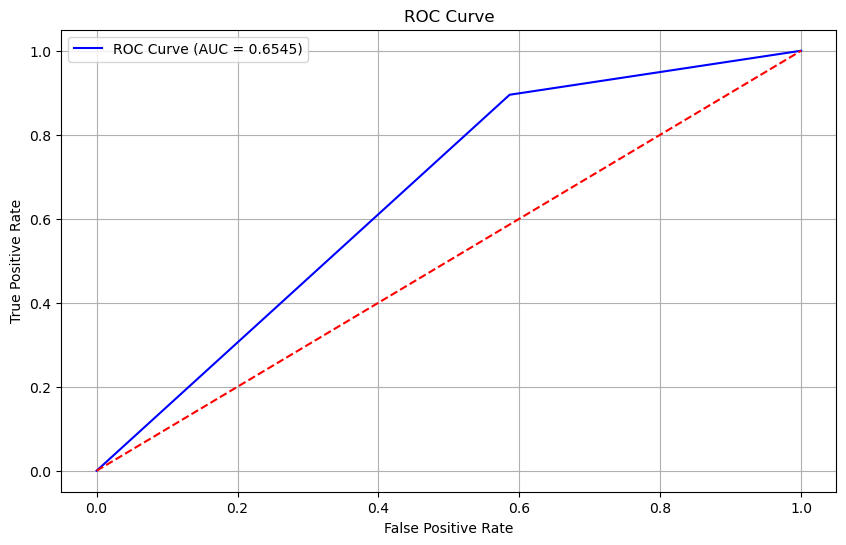

In [52]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

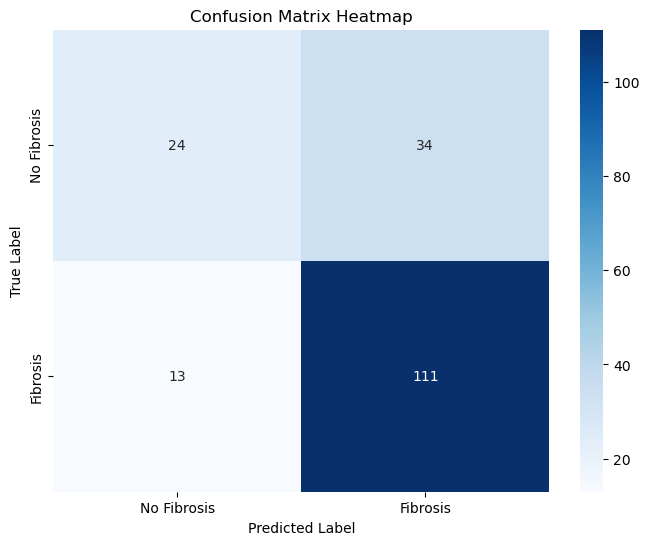

In [53]:
# Plot heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fibrosis', 'Fibrosis'], yticklabels=['No Fibrosis', 'Fibrosis'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [54]:
# Feature importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importance_df)

Feature Importances:
                                     Feature  Importance
3                           Body Mass Index    0.177954
0                                       Age    0.157691
5                    Hip Circumference (cm)    0.145726
2                               Weight (kg)    0.143841
4                  Waist Circumference (cm)    0.141187
1                               Height (cm)    0.127495
7                    Diabetes (No=0, Yes=1)    0.055181
8  Smoking Status(Never Smoked=0, Smoked=1)    0.031989
6                 Gender (Female=0, Male=1)    0.018936


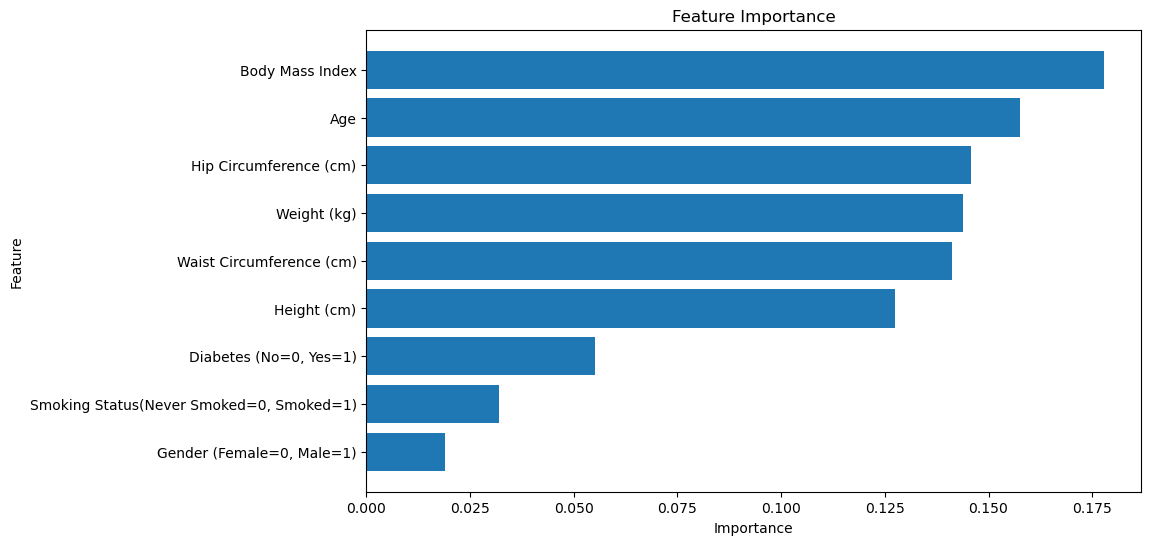

In [55]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [56]:
print("Number of trees in the forest:", len(rf_model.estimators_))

Number of trees in the forest: 100
